In [9]:
reset -sf

In [10]:
%pylab inline

import pandas as pd
import seaborn as sns

from sqlalchemy import create_engine

Populating the interactive namespace from numpy and matplotlib


In [11]:
df = pd.read_csv('dow_jones_index.data')
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [12]:
new_col = []

#make sure there is '.', space or upper letter in columns 
for i in df.columns:
    new_col.append(i.replace(' ', '', len(i)).replace('.', '', len(i)).lower())                   
df.columns = new_col
print(df.columns)

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')


In [13]:
df['open'] = df['open'].map(lambda x: x.lstrip('$'))
df['high'] = df['high'].map(lambda x: x.lstrip('$'))
df['low'] = df['low'].map(lambda x: x.lstrip('$'))
df['close'] = df['close'].map(lambda x: x.lstrip('$'))
df['next_weeks_open'] = df['next_weeks_open'].map(lambda x:x.lstrip('$'))
df['next_weeks_close'] = df['next_weeks_close'].map(lambda x: x.lstrip('$'))

In [14]:
print(df['stock'].count())
df.head()

750


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [150]:
engine = create_engine('sqlite:///dow_jones_index.db')
conn = engine.connect()
df.to_sql('dow_jones_index', conn)

In [15]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [16]:
%sql sqlite:///dow_jones_index.db

'Connected: None@dow_jones_index.db'

### SQL

Q1. Which stock seems the best dividend return for next dividnd based on current price (largest percent_return_next_dividend value)?
>T is the higest dividied return company for next dividend.

In [17]:
%%sql

SELECT stock, percent_return_next_dividend FROM dow_jones_index
GROUP bY stock
ORDER by percent_return_next_dividend DESC
LIMIT 3

Done.


stock,percent_return_next_dividend
T,1.4126100000000001
VZ,1.36111
MRK,1.09986


Q2. Which stock seems the biggest trading volume per week?
>People trade BAC stock the most offen times per week. Meaning is BAC has the biggest trading volume.

In [18]:
%%sql

SELECT stock, volume AS max_volume FROM dow_jones_index
WHERE volume = (SELECT MAX(volume) FROM dow_jones_index)

Done.


stock,max_volume
BAC,1453438639


### EDA

Q1. Calculate the percent of the week which stock price goes up during week for each company?
<br>(each company has percentige like; week for price up/total weeks)

In [19]:
#Total number of data set
total_number = df['stock'].count()
print('The number of total data set:',total_number)

#The data contain 30 company's trading history
df1 = df.drop_duplicates('stock')
com_number = df1.stock.count()
print('The number of companies:',com_number)
hold_weeks_ech_com = total_number/com_number
print('Each company has {0} weeks data hold.'.format(hold_weeks_ech_com))

The number of total data set: 750
The number of companies: 30
Each company has 25.0 weeks data hold.


In [20]:
df.insert(9, 'up', df['percent_change_price'].apply(lambda x: 1 if x>0 else 0))

In [21]:
per = df[(df['up'] == 1)].groupby(['stock']).stock.count()*100/hold_weeks_ech_com
per

stock
AA      48.0
AXP     52.0
BA      56.0
BAC     28.0
CAT     52.0
CSCO    40.0
CVX     56.0
DD      44.0
DIS     52.0
GE      44.0
HD      56.0
HPQ     52.0
IBM     60.0
INTC    48.0
JNJ     52.0
JPM     56.0
KO      56.0
KRFT    60.0
MCD     64.0
MMM     60.0
MRK     40.0
MSFT    36.0
PFE     48.0
PG      44.0
T       44.0
TRV     40.0
UTX     44.0
VZ      48.0
WMT     48.0
XOM     56.0
Name: stock, dtype: float64

Q2. Make a barplot in order to compare trading volume for each company.

In [22]:
mean_volumn = df.groupby(['stock']).volume.sum()/hold_weeks_ech_com
mean_volumn.head()

stock
AA     1.296388e+08
AXP    3.520848e+07
BA     2.378142e+07
BAC    7.229991e+08
CAT    3.373112e+07
Name: volume, dtype: float64

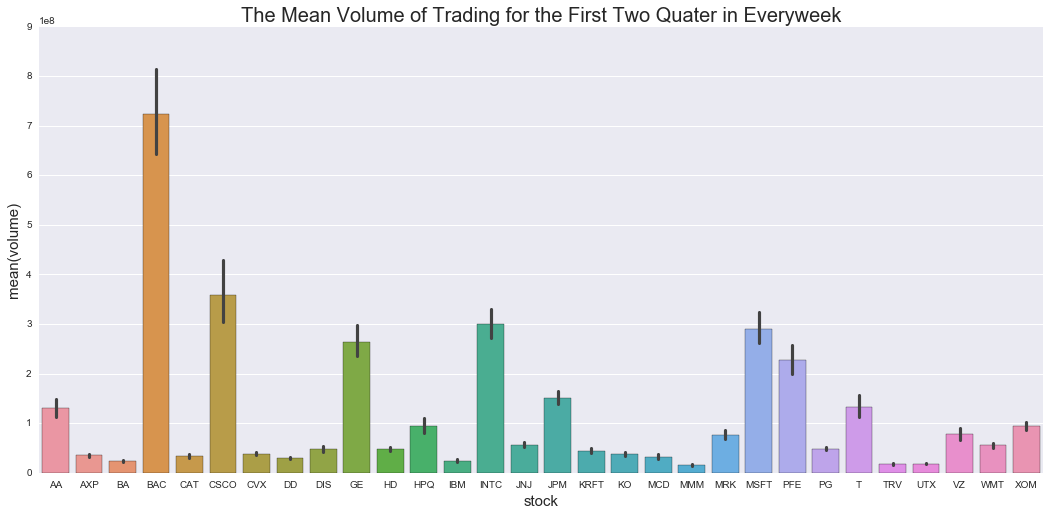

In [23]:
plt.figure(figsize=(18, 8))
plt.title('The Mean Volume of Trading for the First Two Quater in Everyweek', fontsize=20)
plt.xlabel('Stock', fontsize=15)
plt.ylabel('Mean(Volume)', fontsize=15)
sns.barplot('stock', 'volume',data=df);

Q3. Make a boxplot for price change to see amount of price changing during the first two qurter.

In [24]:
weekly_mean_price = (df['open'].astype(float) + df['high'].astype(float) + df['low'].astype(float) + df['close'].astype(float))/4

In [25]:
df.insert(7, 'weekly_mean_price', weekly_mean_price)

In [26]:
df.head()

,quarter,stock,date,open,high,low,close,weekly_mean_price,volume,percent_change_price,up,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,16.1850,239655616,3.79267,1,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,16.2575,242963398,-4.42849,0,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,15.9900,138428495,-2.47066,0,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,16.1125,151379173,1.63831,1,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,16.7225,154387761,5.93325,1,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


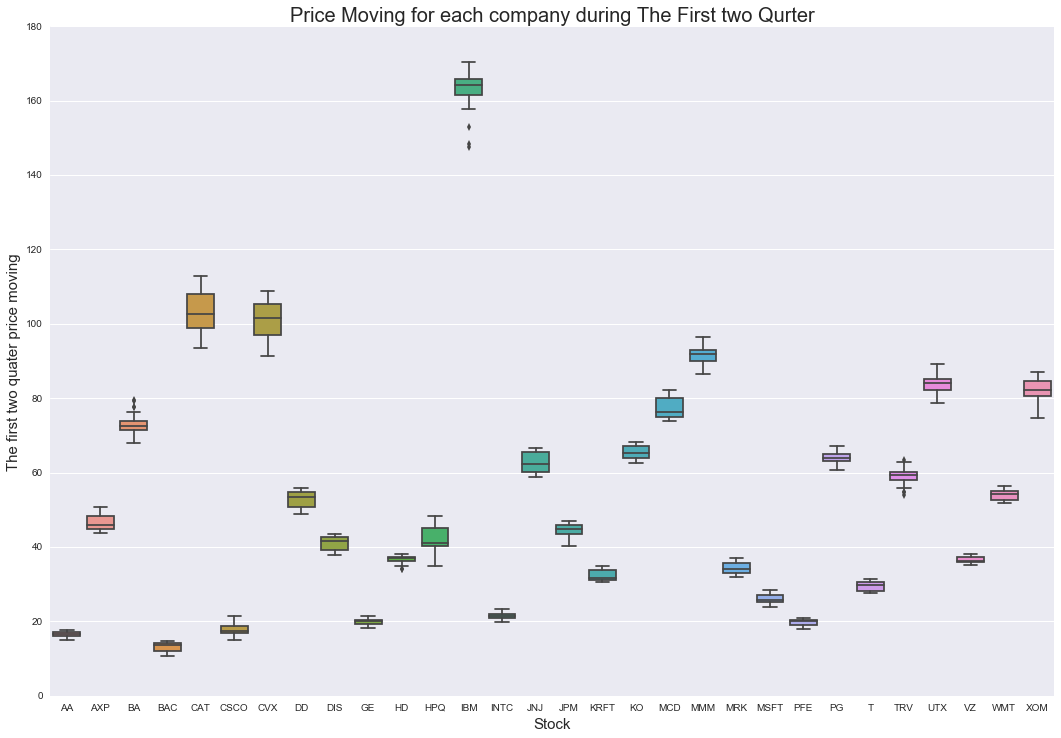

In [27]:
plt.figure(figsize=(18, 12))
plt.title('Price Moving for each company during The First two Qurter', fontsize=20)
sns.boxplot(x=df['stock'], y=df['weekly_mean_price'])
plt.xlabel('Stock', fontsize=15)
plt.ylabel('The first two quater price moving', fontsize=15)

In [28]:
com_list = pd.Series(df['stock'].drop_duplicates())
com_list

0        AA
12      AXP
24       BA
36      BAC
48      CAT
60     CSCO
72      CVX
84       DD
96      DIS
108      GE
120      HD
132     HPQ
144     IBM
156    INTC
168     JNJ
180     JPM
192    KRFT
204      KO
216     MCD
228     MMM
240     MRK
252    MSFT
264     PFE
276      PG
288       T
300     TRV
312     UTX
324      VZ
336     WMT
348     XOM
Name: stock, dtype: object

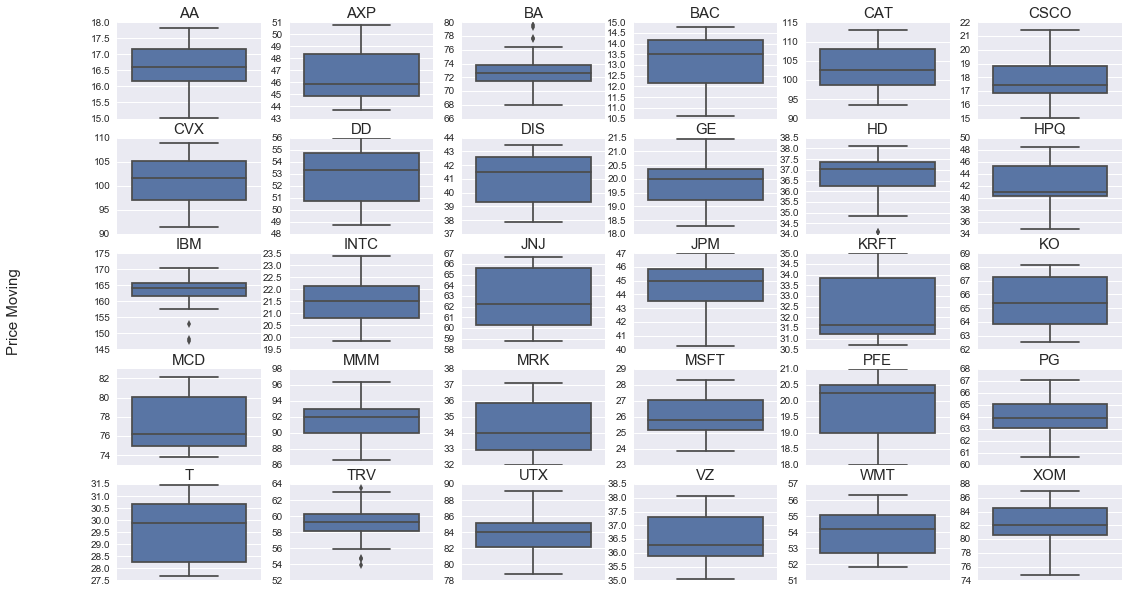

In [29]:
f, axes = plt.subplots(5, 6, figsize=(18,10))
for ax, var in zip(axes.ravel(), com_list):
    var_df = df[df['stock'] == var]
    sns.boxplot(y=var_df['weekly_mean_price'], ax=ax)
    ax.set_ylabel('')
    ax.set_title(var, fontsize=15)
f.text(0.04, 0.5,'Price Moving', va='center', rotation='vertical', fontsize=15)
plt.show()

### EDA/Statistics

 Q1. Calculate the mean and standard deviation of the weely_mean_price column for each stock.

In [30]:
eda_price = df.groupby(['stock']).weekly_mean_price.mean().reset_index()
eda_price['Std'] = df.groupby(['stock']).weekly_mean_price.std().values
eda_price = eda_price.rename(columns={'weekly_mean_price':'Mean'})
eda_price

,stock,Mean,Std
0,AA,16.5368,0.714205
1,AXP,46.5916,2.348613
2,BA,73.2899,3.041019
3,BAC,13.1149,1.346295
4,CAT,102.9355,6.009018
5,CSCO,18.0185,1.918120
6,CVX,100.9652,5.164068
7,DD,52.7010,2.279965
8,DIS,41.1974,1.751832
9,GE,19.8022,0.861980


 Q2. Calculate the mean and standard deviation of the volume column for each stock.

In [31]:
eda_volume = df.groupby(['stock']).volume.mean().reset_index()
eda_volume['Std'] = df.groupby(['stock']).volume.std().values
eda_volume = eda_volume.rename(columns={'volume':'Mean_vol'})
eda_volume

,stock,Mean_vol,Std
0,AA,129638810,4.968542e+07
1,AXP,35208481,7.123567e+06
2,BA,23781420,5.815169e+06
3,BAC,722999135,2.160241e+08
4,CAT,33731115,9.279858e+06
5,CSCO,358661587,1.665396e+08
6,CVX,38579829,9.342458e+06
7,DD,29116658,6.486929e+06
8,DIS,47443673,1.532448e+07
9,GE,263938078,8.674084e+07


### Statistics/Random Sampling

Q1. Compare sample statistics & population statistics for percent_change_price each week.
>The mean from sample have some difference as compare with mean from populations. Which means that the range of sample mean is wider than populations mean(when number of sample getting close to number of populations, the sample mean will be getting close to population mean.

In [32]:
sample_per_change_price = df['percent_change_price'].sample(100)
sample_per_change_price.describe()

count    100.000000
mean       0.537433
std        2.266091
min       -4.489360
25%       -0.840917
50%        0.355571
75%        1.976908
max        6.102250
Name: percent_change_price, dtype: float64

In [33]:
pop_per_change_price = df['percent_change_price']
pop_per_change_price.describe()

count    750.000000
mean       0.050262
std        2.517809
min      -15.422900
25%       -1.288053
50%        0.000000
75%        1.650888
max        9.882230
Name: percent_change_price, dtype: float64

Q2. Make histograms of the percent_change_price each week sample & population.
>The histogram for population is similar to norm distribution. 
Meaning is that population of mean of density is higer than sample.

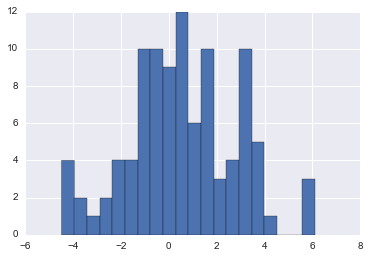

In [34]:
plt.hist(sample_per_change_price, bins=20);

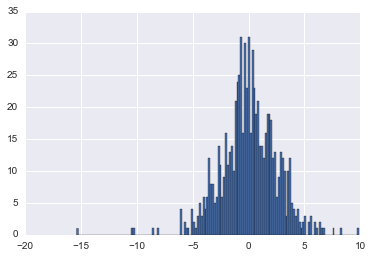

In [35]:
plt.hist(pop_per_change_price, 150);

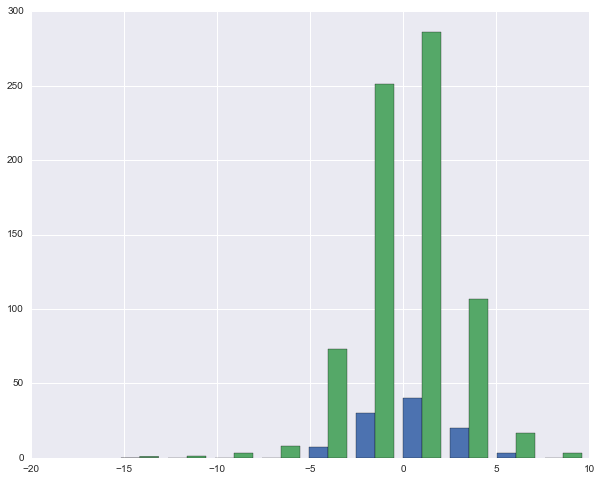

In [36]:
plt.figure(figsize=(10,8))
plt.hist([sample_per_change_price, pop_per_change_price], 10);
#plt.legend()

Q3. Compare sample statistics & population statistics for percent_change_volume each week.
>The mean from sample have some difference as compare with mean from populations. Which means that the range of sample mean is wider than populations mean(when number of sample getting close to number of populations, the sample mean will be getting close to population mean.

In [37]:
sample_per_change_volume = df['percent_change_volume_over_last_wk']
sample_per_change_volume = sample_per_change_volume.dropna()
sample_per_change_volume = sample_per_change_volume.sample(100)
sample_per_change_volume.describe()

count    100.000000
mean       3.466402
std       31.907535
min      -59.668839
25%      -19.264014
50%        0.647696
75%       21.206531
max      108.457928
Name: percent_change_volume_over_last_wk, dtype: float64

In [38]:
pop_per_change_volume = df['percent_change_volume_over_last_wk']
pop_per_change_volume = pop_per_change_volume.dropna()
pop_per_change_volume.describe()

count    720.000000
mean       5.593627
std       40.543478
min      -61.433175
25%      -19.804284
50%        0.512586
75%       21.800622
max      327.408924
Name: percent_change_volume_over_last_wk, dtype: float64

Q4. Make histograms of the percent_change_volume each week sample & population.
>The histogram for population is similar to norm distribution. 

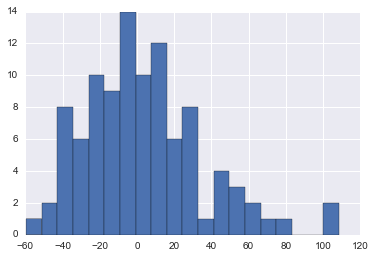

In [39]:
plt.hist(sample_per_change_volume, 20);

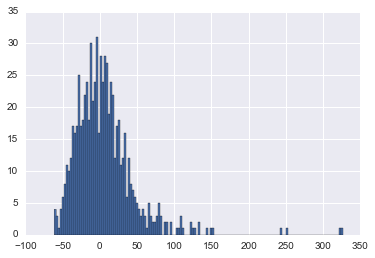

In [40]:
plt.hist(pop_per_change_volume, 145);

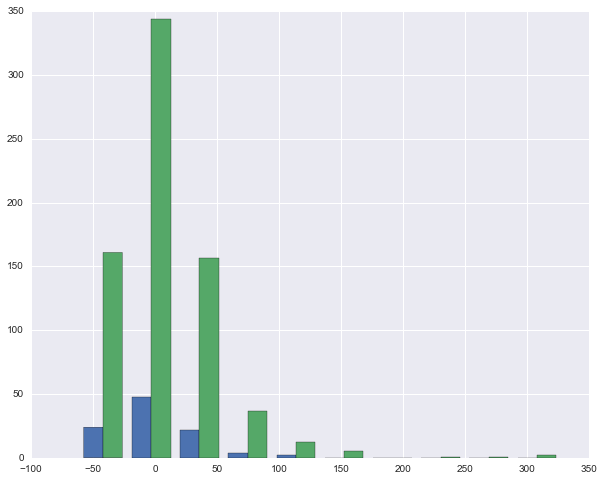

In [41]:
plt.figure(figsize=(10,8))
plt.hist([sample_per_change_volume, pop_per_change_volume]);

### Probability

>Assume you will buy 5 stocks next week from the list of above data set, and you want to hold for a week every five stocks. All stocks follow statistical history for next a couple weeks.

Q1. What is the probability that all 5 stock's price go up?

In [42]:
go_up_stock = df.ix[df['up'] == 1].groupby(['stock']).up.count().sum()

In [43]:
total_weeks = df['date'].count()
print(go_up_stock, total_weeks)

371 750


In [44]:
import numpy as np

percent_your_pick_go_up_next_week = 1
for i in range(5):
    percent_your_pick_go_up_next_week *= (go_up_stock-i)/(total_weeks-i)
print('The {0:.3}% chance to your all pick(all 5 stocks) go up in next week.'.format(percent_your_pick_go_up_next_week*100))

The 2.92% chance to your all pick(all 5 stocks) go up in next week.


Q2. What is the probability that at least 1 stock's price go up out of 5 your pick?
>The probability of at least one price of stock go up is the same as the probability 1 - all 5 price of stock go down.

In [45]:
go_down_stock = df[df['up'] == 0].groupby(['stock']).up.count().sum()
total_weeks =df['date'].count()
print(go_down_stock, total_weeks)

379 750


In [46]:
per_at_least_one_pick_go_up = 1
for j in range(5):
    per_at_least_one_pick_go_up *= (go_down_stock-i)/(total_weeks-i)
print('The {0:.3}% chance to at least one your pick(1 or more stocks) go up in next week.'.format((1-per_at_least_one_pick_go_up)*100))

The 96.8% chance to at least one your pick(1 or more stocks) go up in next week.


### Distributions
>Suppose you buy stock at random for tomorrow, then hold a week. 
What is the probability that you buy the stock which price go up at the 2nd draw?

*Let X be the number of draws before buying a stoch which price go up. 
Then X ~ geometric with p = 371/750, so we want to calcualte P(X = 2).*

In [49]:
print(go_up_stock, total_number)

371 750


In [54]:
from scipy.stats import geom

In [55]:
geom.pmf(2, 371/750, loc=0)

0.24997155555555559

In [62]:
#By hand;
((1-371/750)**(2-1))*371/750
print('The probabilty of getting the 1st stock which price go up on the 2nd pick is 25%.')

The probabilty of getting the 1st stock which price go up on the 2nd pick is 25%.


Q2. Plotting normal distribution for each stock about price moving?

In [64]:
eda_price.head()

,stock,Mean,Std
0,AA,16.5368,0.714205
1,AXP,46.5916,2.348613
2,BA,73.2899,3.041019
3,BAC,13.1149,1.346295
4,CAT,102.9355,6.009018


/Users/yun/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


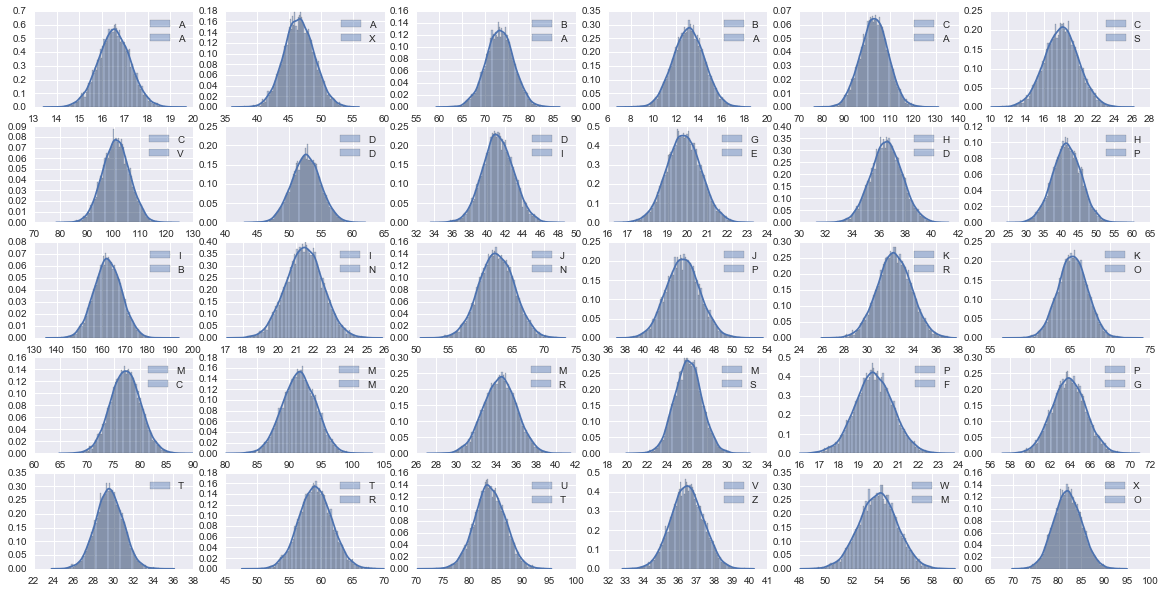

In [70]:
f, axes = plt.subplots(5, 6, figsize=(20,10))
for ax, var in zip(axes.ravel(), com_list):
    stock_match = eda_price[eda_price['stock'] == var]
    norm_dist = stats.norm(stock_match['Mean'].values, stock_match['Std'].values)
    norm_sample = norm_dist.rvs(10000)
    sns.distplot(norm_sample, bins=100, ax=ax, label=var)
    #ax.set_xlabel(var)
    ax.legend(var)
plt.show()